In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,inbtou_spending,inbtou_spending_travel,inbtou_spending_transport,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,,,
2010,NaN,2.396000e+09,2.187000e+09,209000000.0,0,0,0.000000,2010
2011,NaN,2.503000e+09,2.283000e+09,220000000.0,0,0,0.000000,2011
2012,NaN,2.614000e+09,2.326000e+09,288000000.0,0,0,0.000000,2012
2013,2490900.0,2.608000e+09,2.325000e+09,283000000.0,0,0,0.000000,2013
2014,2654700.0,2.546000e+09,2.367000e+09,179000000.0,0,0,0.000000,2014
2015,3152400.0,2.819000e+09,2.601000e+09,218000000.0,0,0,0.000000,2015
2016,3585200.0,3.069000e+09,2.907000e+09,162000000.0,0,0,0.000000,2016
2017,4143400.0,3.302000e+09,3.186000e+09,116000000.0,0,0,0.000000,2017
2018,4111600.0,2.783000e+09,2.703000e+09,80000000.0,0,0,0.000000,2018


Estimated COVID-19 effect: -3786111 ± 506121 (95% confidence)


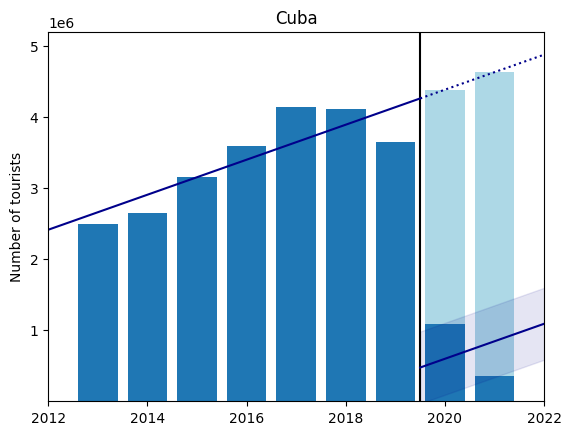

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.43e-05
Time:                        03:40:05   Log-Likelihood:                 10.048
No. Observations:                   9   AIC:                            -12.10
Df Residuals:                       5   BIC:                            -11.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -150

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# Set up plot
plt.title('Cuba')
plt.ylabel('Number of tourists')
plt.ylim(1, 5.2 * 10**6)
plt.xlim(2012, 2022)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -2253469879 ± 290479822 (95% confidence)


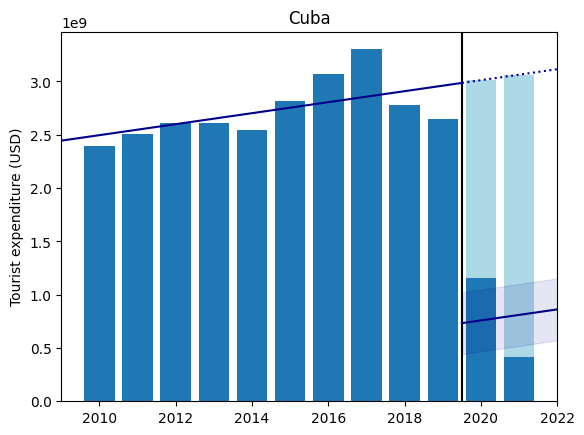

                             OLS Regression Results                            
Dep. Variable:     log_inbtou_spending   R-squared:                       0.986
Model:                             OLS   Adj. R-squared:                  0.981
Method:                  Least Squares   F-statistic:                     192.9
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):           8.47e-08
Time:                         03:40:21   Log-Likelihood:                 15.783
No. Observations:                   12   AIC:                            -23.57
Df Residuals:                        8   BIC:                            -21.63
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
# Set up plot
plt.title('Cuba')
plt.ylabel('Tourist expenditure (USD)')
plt.xlim(2009, 2022)
y_name = 'inbtou_spending'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -2217407228 ± 287586537 (95% confidence)


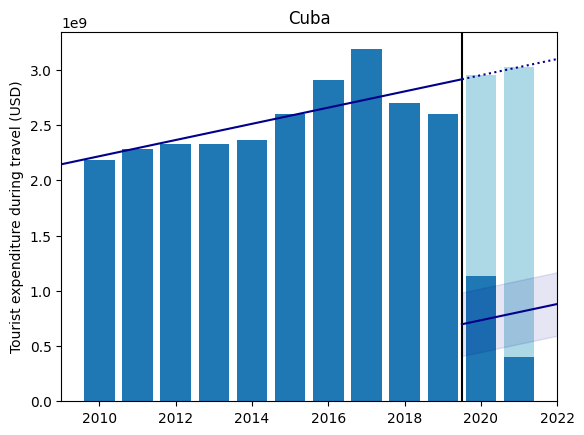

                                OLS Regression Results                                
Dep. Variable:     log_inbtou_spending_travel   R-squared:                       0.986
Model:                                    OLS   Adj. R-squared:                  0.980
Method:                         Least Squares   F-statistic:                     183.4
Date:                        Wed, 26 Apr 2023   Prob (F-statistic):           1.03e-07
Time:                                03:40:27   Log-Likelihood:                 15.738
No. Observations:                          12   AIC:                            -23.48
Df Residuals:                               8   BIC:                            -21.54
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
# Set up plot
plt.title('Cuba')
plt.ylabel('Tourist expenditure during travel (USD)')
plt.xlim(2009, 2022)
y_name = 'inbtou_spending_travel'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -36062650 ± 46188767 (95% confidence)


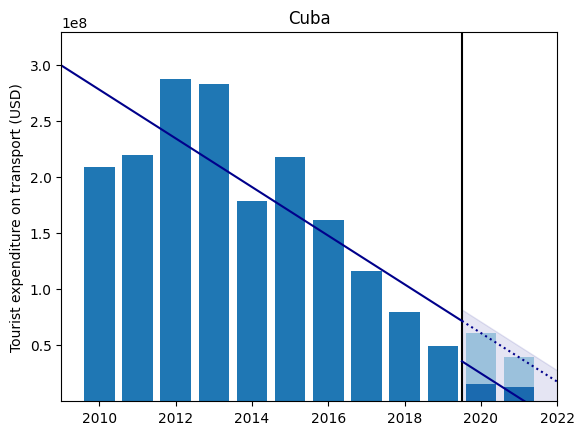

                                  OLS Regression Results                                 
Dep. Variable:     log_inbtou_spending_transport   R-squared:                       0.933
Model:                                       OLS   Adj. R-squared:                  0.908
Method:                            Least Squares   F-statistic:                     37.04
Date:                           Wed, 26 Apr 2023   Prob (F-statistic):           4.87e-05
Time:                                   03:41:15   Log-Likelihood:                -1.2298
No. Observations:                             12   AIC:                             10.46
Df Residuals:                                  8   BIC:                             12.40
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
# Set up plot
plt.title('Cuba')
plt.ylabel('Tourist expenditure on transport (USD)')
plt.xlim(2009, 2022)
plt.ylim(1, 3.3 * 10**8)
y_name = 'inbtou_spending_transport'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)